In [27]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import scipy
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os

In [28]:
if not os.path.exists('constituents-financials.csv'):
    urllib.request.urlretrieve("https://datahub.io/core/s-and-p-500-companies-financials/r/constituents-financials.csv", "constituents-financials.csv")


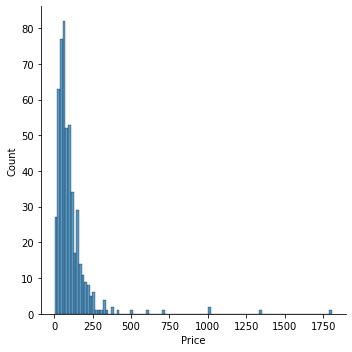

In [29]:
data = pd.read_csv('constituents-financials.csv')
sns.displot(data.Price, kde=False)


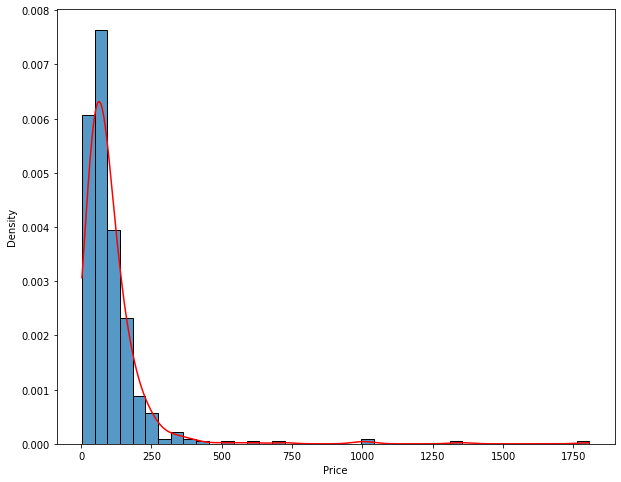

In [30]:
plt.figure(figsize=(10, 8))

kernel = st.gaussian_kde(data.Price)
print(kernel)
min_amount, max_amount = data.Price.min(), data.Price.max()
x = np.linspace(min_amount, max_amount, len(data.Price))
kde_values = kernel(x)

sns.histplot(data.Price, kde=False, bins=40, stat='density', label=f'Average price in dollars')
plt.plot(x, kde_values, color='r')

iqr 70.29
1/4 quantile 46.25 3/4 quantile 116.54
min -59.185 max 151.685
median 73.92


<AxesSubplot:>

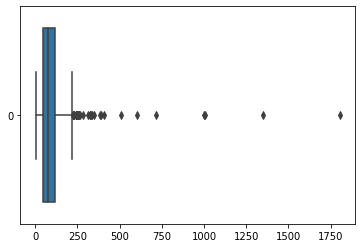

In [31]:
price = data.Price
# price = price[price.between(price.min(), price.quantile(.99))].reset_index(drop=True)

q1 = price.quantile(0.25)
q3 = price.quantile(0.75)
iqr =  q3 -  q1
print('iqr', iqr)
print('1/4 quantile', price.quantile(1/4), '3/4 quantile', price.quantile(3/4))
print('min', q1-1.5*iqr, 'max', q1+1.5*iqr)
print('median', price.median())
sns.boxplot(data=price, orient='h')

s = 0.7564047240073324, loc = -1.6683261653102743, scale = 76.34224847520608


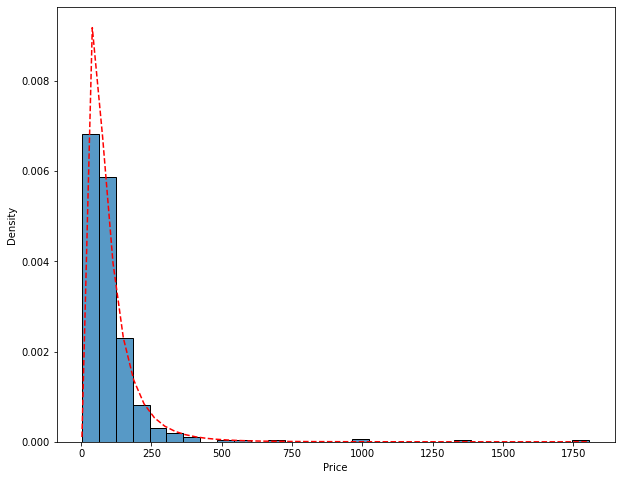

In [32]:
plt.figure(figsize=(10, 8))
x = np.linspace(np.min(price), np.max(price))
params = scipy.stats.lognorm.fit(price)
print(f's = {params[0]}, loc = {params[1]}, scale = {params[2]}')
sns.histplot(price, kde=False, bins=30, stat='density', label=f'Average price in dollars')
pdf = scipy.stats.lognorm.pdf((x - params[1]) / params[2], params[0]) / params[2]
plt.plot(x, pdf, 'r--')
plt.show()

[3.4983241  0.02905288]


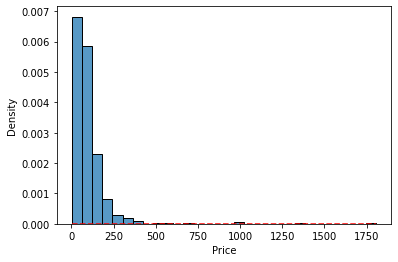

In [33]:
def lognorm_pdf(x, mu, sigma):
    exp = np.exp(-(np.log(x) - mu)**2 / (2 * sigma ** 2))
    frac = 1 / (x * sigma * (2 * np.pi) ** 0.5)
    return frac * exp

hist, bin_edges = np.histogram(price, bins=30, density=True)
freq = [(bin_edges[i+1] - bin_edges[i]) * hist[i] for i in range(len(hist) - 1)]
positions = [(bin_edges[i] + bin_edges[i+1])/2  for i in range(len(hist) - 1)]
res_lsq, _ = scipy.optimize.curve_fit(lognorm_pdf, positions, freq)
print(res_lsq)
mu, sigma = res_lsq
x = np.linspace(np.min(price), np.max(price))
pdf = scipy.stats.lognorm.pdf(x , s =  sigma, loc=mu)
sns.histplot(price, kde=False, bins=30, stat='density', label=f'Average price in dollars')

plt.plot(x, pdf, 'r--')

In [34]:

ks = scipy.stats.kstest(price, 'lognorm', params, N=100)
chi2 = scipy.stats.chisquare(price)
print(ks)
print(chi2)

KstestResult(statistic=0.034541777326868695, pvalue=0.5711796838510748)
Power_divergenceResult(statistic=87716.67382986039, pvalue=0.0)


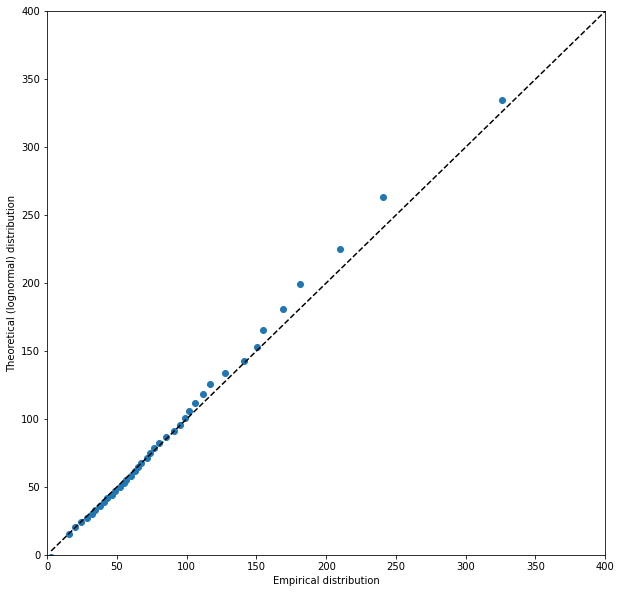

In [35]:
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution

# Calculation of quantiles
percs = np.linspace(0, 100, 41)
qn_first = np.percentile(price, percs)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *params)

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (lognormal) distribution')

plt.show()